<a href="https://colab.research.google.com/github/mushrafi88/Random_walk/blob/main/random_walk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Theoretical Prediction of Random Walk's Probability Density Function

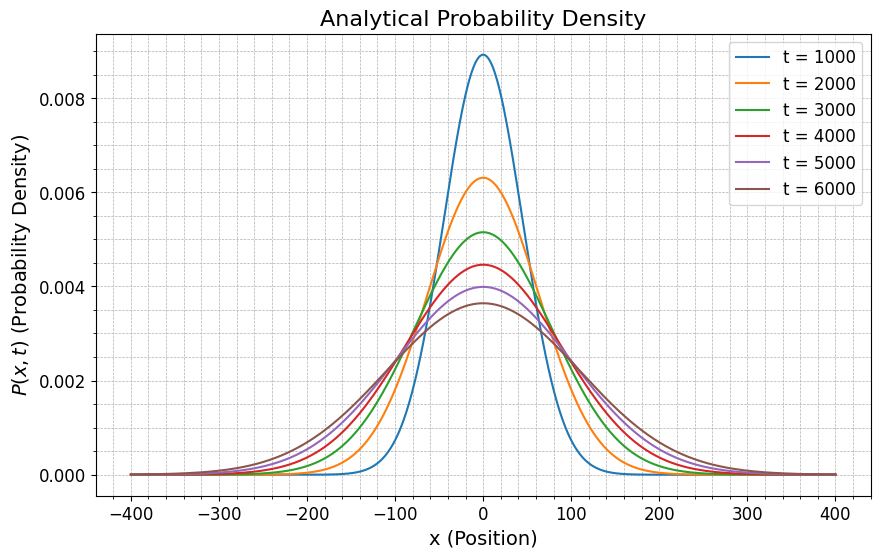

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
D = 1  # Diffusion coefficient
time_steps = [1000, 2000, 3000, 4000, 5000, 6000]
x_values = np.linspace(-400, 400, 1000)  # Range of x values

# Define the function P(x, t)
def P(x, t, D):
    return (1 / np.sqrt(4 * np.pi * D * t)) * np.exp(-x**2 / (4 * D * t))

# Plot P(x, t) for different time steps
plt.figure(figsize=(10, 6))

for t in time_steps:
    y_values = P(x_values, t, D)
    plt.plot(x_values, y_values, label=f't = {t}')

# Enhance plot aesthetics
plt.title(r'Analytical Probability Density', fontsize=16)
plt.xlabel('x (Position)', fontsize=14)
plt.ylabel(r'$P(x,t)$ (Probability Density)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.legend(fontsize=12)
plt.show()


# Random Walk in 1-D lattice with crude probability

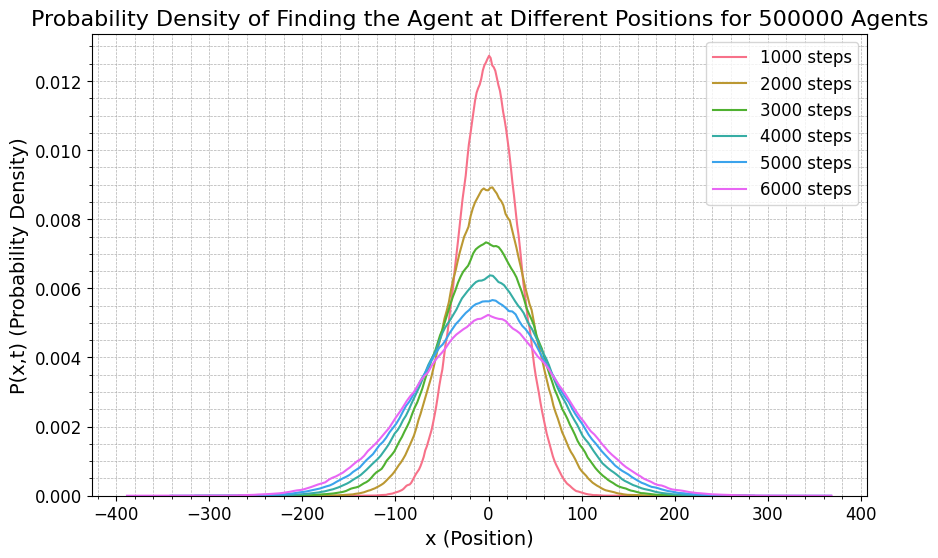

In [2]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_agents = 500000
time_steps = [1000, 2000, 3000, 4000, 5000, 6000]
colors = sns.color_palette("husl", len(time_steps))
positions_data = {}
plt.figure(figsize=(10, 6))

for i, num_steps in enumerate(time_steps):
    all_positions = torch.zeros(num_agents, device=device)
    for _ in range(num_steps):
        steps = torch.randint(0, 2, (num_agents,), device=device) * 2 - 1
        all_positions += steps

    all_positions_np = all_positions.cpu().numpy()
    positions_data[num_steps] = all_positions_np
    sns.kdeplot(all_positions_np, bw_adjust=0.5, color=colors[i], label=f'{num_steps} steps')

# Enhance plot aesthetics
plt.title(f'Probability Density of Finding the Agent at Different Positions for {num_agents} Agents', fontsize=16)
plt.xlabel('x (Position)', fontsize=14)
plt.ylabel('P(x,t) (Probability Density)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.legend(fontsize=12)
plt.show()

# Random Walk in 1-D lattice with Gaussian Kernel Density Estimation

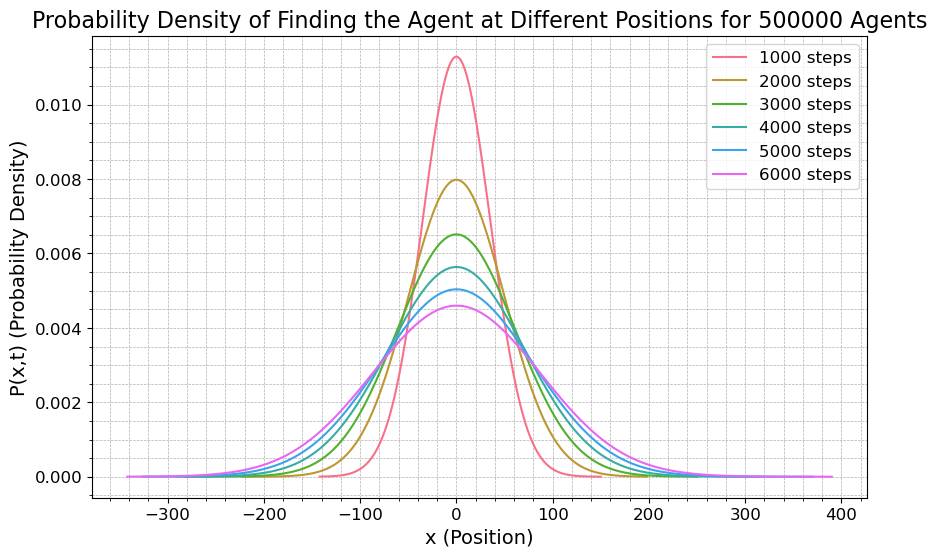

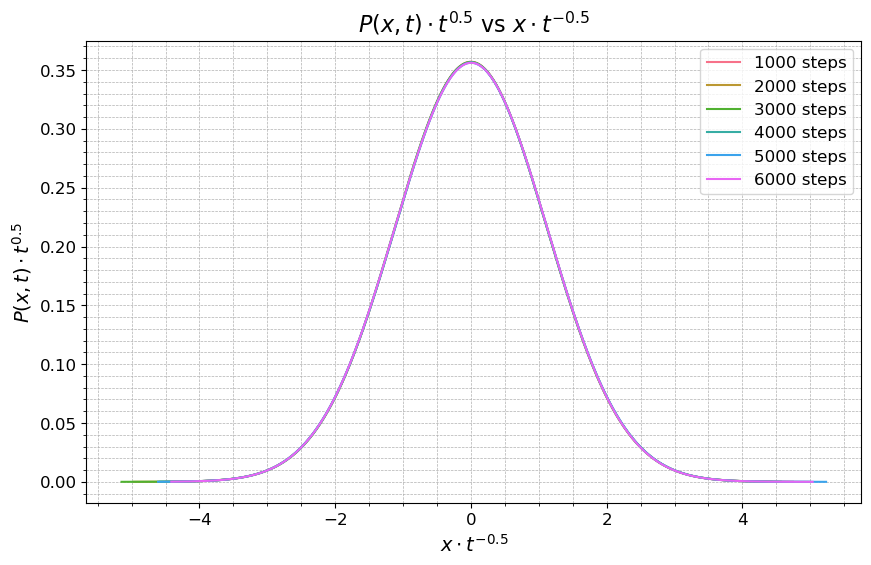

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Parameters
num_agents = 500000
time_steps = [1000, 2000, 3000, 4000, 5000, 6000]
colors = sns.color_palette("husl", len(time_steps))

# Dictionary to store positions and KDE for each time step
data = {}
plt.figure(figsize=(10, 6))

for i, num_steps in enumerate(time_steps):
    all_positions = torch.zeros(num_agents, device=device) # An array to store the final positions of all agents

    # Perform the random walk for each agent
    for _ in range(num_steps):
        steps = torch.randint(0, 2, (num_agents,), device=device) * 2 - 1
        all_positions += steps

    all_positions_np = all_positions.cpu().numpy()
    data[num_steps] = {'positions': all_positions_np}

    # Calculate the Kernel Density Estimation
    kde = gaussian_kde(all_positions_np, bw_method=0.5)
    x_range = np.linspace(np.min(all_positions_np), np.max(all_positions_np), 1000)
    kde_values = kde(x_range)
    data[num_steps]['kde'] = (x_range, kde_values)
    plt.plot(x_range, kde_values, color=colors[i], label=f'{num_steps} steps')

plt.title(f'Probability Density of Finding the Agent at Different Positions for {num_agents} Agents', fontsize=16)
plt.xlabel('x (Position)', fontsize=14)
plt.ylabel('P(x,t) (Probability Density)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.legend(fontsize=12)
plt.show()

# Plot P(x,t) * t^(0.5) vs x * t^(-0.5)
plt.figure(figsize=(10, 6))

for i, num_steps in enumerate(time_steps):
    x_range, kde_values = data[num_steps]['kde']
    x_transformed = x_range * num_steps**(-0.5)
    p_transformed = kde_values * num_steps**(0.5)
    plt.plot(x_transformed, p_transformed, color=colors[i], label=f'{num_steps} steps')

plt.title(r'$P(x,t) \cdot t^{0.5}$ vs $x \cdot t^{-0.5}$', fontsize=16)
plt.xlabel(r'$x \cdot t^{-0.5}$', fontsize=14)
plt.ylabel(r'$P(x,t) \cdot t^{0.5}$', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.legend(fontsize=12)
plt.show()

# Random Walk with random steps of order 5 (-5,5)

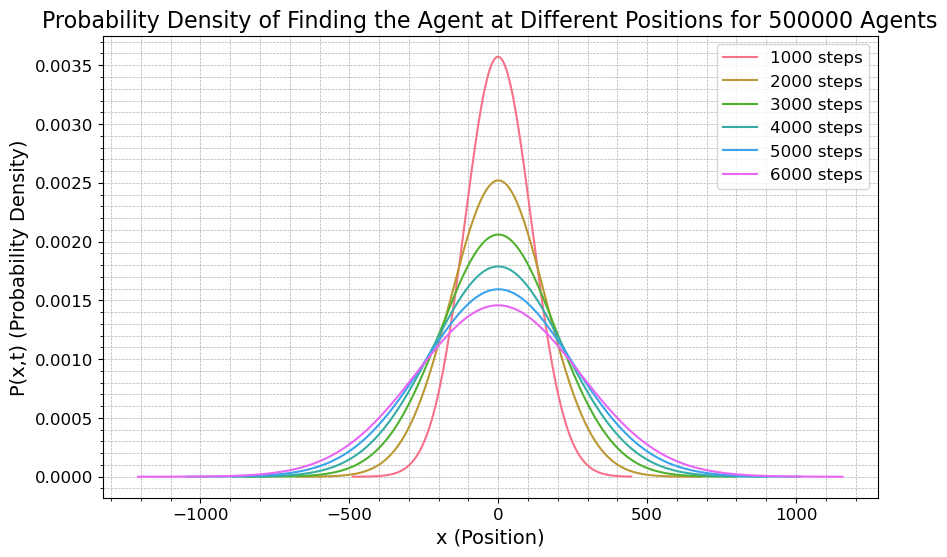

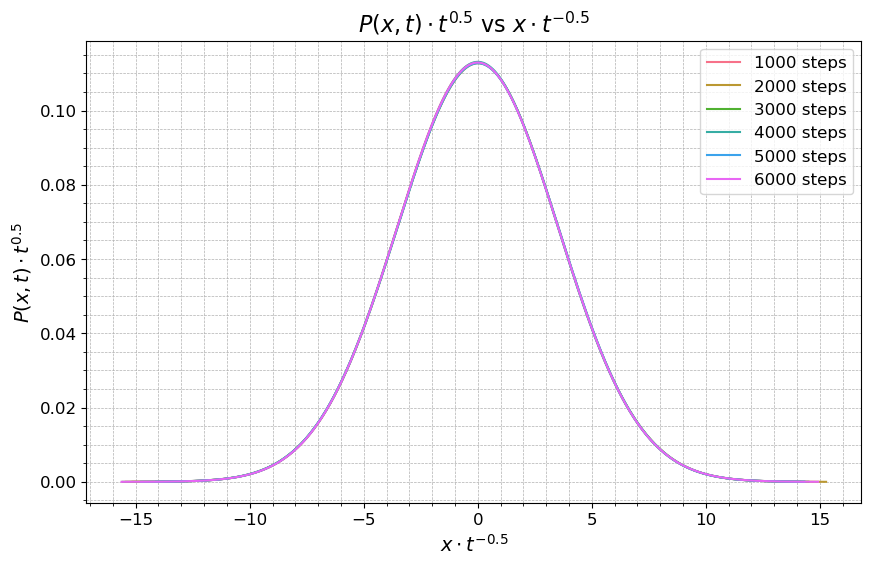

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Parameters
num_agents = 500000
time_steps = [1000, 2000, 3000, 4000, 5000, 6000]
colors = sns.color_palette("husl", len(time_steps))

# Dictionary to store positions and KDE for each time step
data = {}
plt.figure(figsize=(10, 6))

for i, num_steps in enumerate(time_steps):
    all_positions = torch.zeros(num_agents, device=device) # An array to store the final positions of all agents

    # Perform the random walk for each agent
    for _ in range(num_steps):
        steps = torch.randint(0, 11, (num_agents,), device=device) - 5
        all_positions += steps

    all_positions_np = all_positions.cpu().numpy()
    data[num_steps] = {'positions': all_positions_np}

    # Calculate the Kernel Density Estimation
    kde = gaussian_kde(all_positions_np, bw_method=0.5)
    x_range = np.linspace(np.min(all_positions_np), np.max(all_positions_np), 1000)
    kde_values = kde(x_range)
    data[num_steps]['kde'] = (x_range, kde_values)
    plt.plot(x_range, kde_values, color=colors[i], label=f'{num_steps} steps')

plt.title(f'Probability Density of Finding the Agent at Different Positions for {num_agents} Agents', fontsize=16)
plt.xlabel('x (Position)', fontsize=14)
plt.ylabel('P(x,t) (Probability Density)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.legend(fontsize=12)
plt.show()

# Plot P(x,t) * t^(0.5) vs x * t^(-0.5)
plt.figure(figsize=(10, 6))

for i, num_steps in enumerate(time_steps):
    x_range, kde_values = data[num_steps]['kde']
    x_transformed = x_range * num_steps**(-0.5)
    p_transformed = kde_values * num_steps**(0.5)
    plt.plot(x_transformed, p_transformed, color=colors[i], label=f'{num_steps} steps')

plt.title(r'$P(x,t) \cdot t^{0.5}$ vs $x \cdot t^{-0.5}$', fontsize=16)
plt.xlabel(r'$x \cdot t^{-0.5}$', fontsize=14)
plt.ylabel(r'$P(x,t) \cdot t^{0.5}$', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.legend(fontsize=12)
plt.show()

# Random walk of shrinking steps (1/sqrt(t))

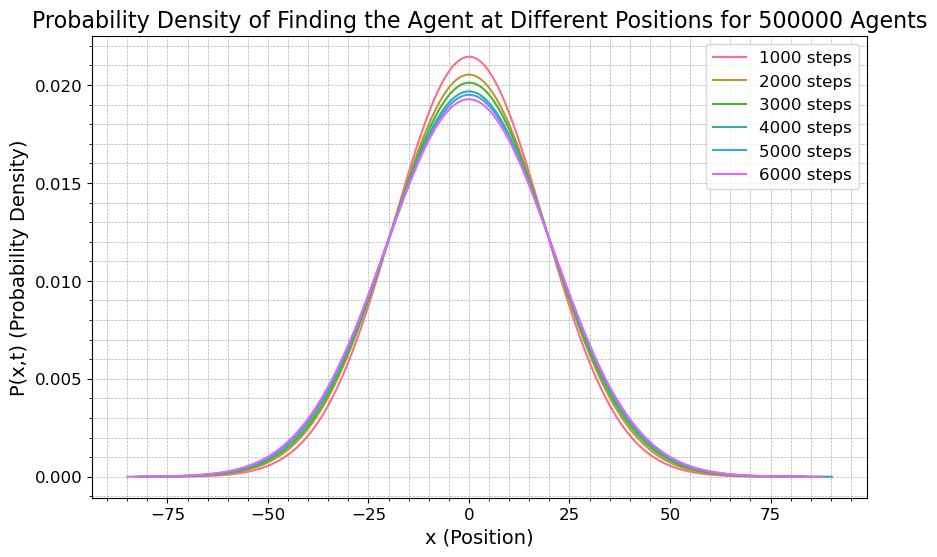

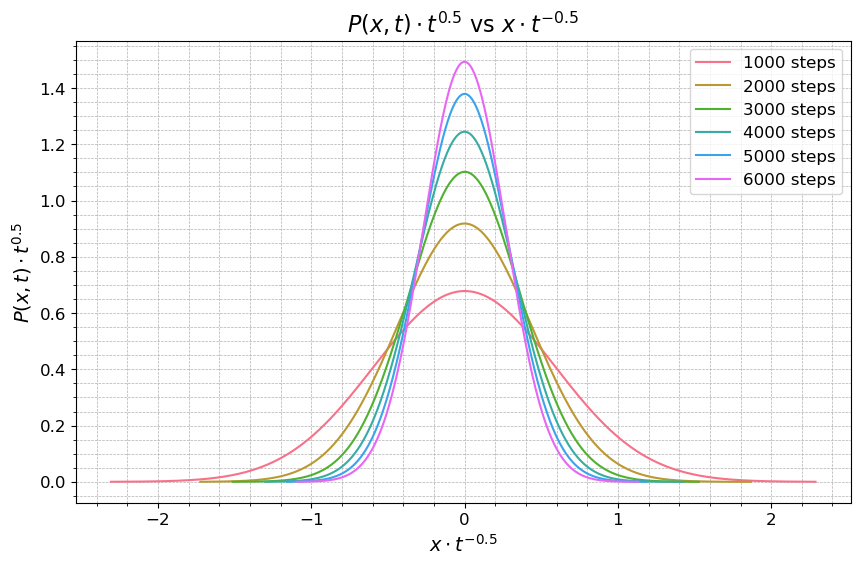

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Parameters
num_agents = 500000
time_steps = [1000, 2000, 3000, 4000, 5000, 6000]
colors = sns.color_palette("husl", len(time_steps))

# Dictionary to store positions and KDE for each time step
data = {}
plt.figure(figsize=(10, 6))

for i, num_steps in enumerate(time_steps):
    all_positions = torch.zeros(num_agents, device=device) # An array to store the final positions of all agents

    for t in range(1, num_steps + 1):
        steps = (torch.randint(0, 21, (num_agents,), device=device) - 10 ) / torch.sqrt(torch.tensor(t, device=device))
        all_positions += steps

    all_positions_np = all_positions.cpu().numpy()
    data[num_steps] = {'positions': all_positions_np}

    # Calculate the Kernel Density Estimation
    kde = gaussian_kde(all_positions_np, bw_method=0.5)
    x_range = np.linspace(np.min(all_positions_np), np.max(all_positions_np), 1000)
    kde_values = kde(x_range)
    data[num_steps]['kde'] = (x_range, kde_values)
    plt.plot(x_range, kde_values, color=colors[i], label=f'{num_steps} steps')

plt.title(f'Probability Density of Finding the Agent at Different Positions for {num_agents} Agents', fontsize=16)
plt.xlabel('x (Position)', fontsize=14)
plt.ylabel('P(x,t) (Probability Density)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.legend(fontsize=12)
plt.show()

# Plot P(x,t) * t^(0.5) vs x * t^(-0.5)
plt.figure(figsize=(10, 6))

for i, num_steps in enumerate(time_steps):
    x_range, kde_values = data[num_steps]['kde']
    x_transformed = x_range * num_steps**(-0.5)
    p_transformed = kde_values * num_steps**(0.5)
    plt.plot(x_transformed, p_transformed, color=colors[i], label=f'{num_steps} steps')

plt.title(r'$P(x,t) \cdot t^{0.5}$ vs $x \cdot t^{-0.5}$', fontsize=16)
plt.xlabel(r'$x \cdot t^{-0.5}$', fontsize=14)
plt.ylabel(r'$P(x,t) \cdot t^{0.5}$', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.legend(fontsize=12)
plt.show()